<strong style="color: #800020; font-size: 28px"> 

Segunda (2ª) versión del modelo: con tratamiento de scaling

</strong>

<strong style="color: #800020; font-size: 20px"> 

Algoritmo: StandardScaler

</strong>

<strong style="color: #FF8C00; font-size: 28px"> 

0.Definición del problema y objetivo 

</strong>

1. El problema es no tener una estimación de quales equipos pueden descender.

2. Desarrollo de un modelo de machine learning capaz de predicir el descenso a la segunda división del campeonato brasileño;

2. La variable objetivo se refiere al resultado de descenso después de los resultados de la jornada 31.

<strong style="color: #FF8C00; font-size: 28px"> 

1.Recolección y entendimiento de los datos

</strong>

In [23]:
# Importación de las bibliotecas básicas
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [24]:
# Importación de la base de datos
df = pd.read_csv(r'C:\Users\nayar\OneDrive\Data Science\Projetos\Futebol\brasileirao_2006_2023.csv', sep=';', encoding='ISO-8859-1')

In [25]:
# Visualización de la base importada
df.head()

,N,Time,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols Feitos,Gols Sofridos,Final,Campeão,Rebaixado,Ano
0,1,São Paulo,63,31,18,9,4,56,30,1,1,0,2006
1,2,Internacional,56,31,16,8,7,42,30,2,0,0,2006
2,3,Santos,55,31,16,7,8,50,29,4,0,0,2006
3,4,Grêmio,55,31,16,7,8,52,37,3,0,0,2006
4,5,Vasco,50,31,13,11,7,46,39,6,0,0,2006


<strong style="color: #FF8C00; font-size: 16px"> 

Diccionario:
    
</strong>

### _Sobre la base:_
La base incluye las ediciones del campeonato brasileño Serie A, de 2006 a 2023.



### _Diccionario:_
**Time:** equipo presente en la competición en la edición.

**Pontos:** Los puntos del equipo en la trigésima (31ª) jornada del campeonato.

**Vitória:** Número de victorias del equipo.

**Empates:** Número de empates para el equipo.

**Derrotas:** Número de derrotas de equipo.

**Gols Feitos:** Número de goles marcados

**Gols Sofridos:** Número de goles encajados

**Final:** Posición del equipo al final de las 38 jornadas.

**Campeão:** Marcando si el equipo fue campeón o no.

**Rebaixado:** Si descendido a segunda división al final de la competición.

**Ano:** Año de competición

<strong style="color: #FF8C00; font-size: 22px"> 

1.1.Comprensión de los datos

</strong>

En este tema, entenderemos los datos y la base.

In [26]:
# Comprensión de la ausencia de valores
df.isnull().sum()

N                0
Time             0
Pontos           0
Jogos            0
Vitorias         0
Empates          0
Derrotas         0
Gols Feitos      0
Gols Sofridos    0
Final            0
Campeão          0
Rebaixado        0
Ano              0
dtype: int64

### Conclusión:

No hay alguna variable con ausencia de valor.

In [27]:
# Evaluando la resumisión estadística de los valores de las variables
df.iloc[:,2:-1].describe()

,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols Feitos,Gols Sofridos,Final,Campeão,Rebaixado
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,42.297222,31.019444,11.308333,8.402778,11.308333,38.575000,38.572222,10.652778,0.050000,0.200000
std,10.259746,0.368932,3.552540,2.444138,3.677370,8.801743,9.043707,6.360480,0.218248,0.400557
min,15.000000,31.000000,1.000000,2.000000,2.000000,13.000000,12.000000,1.000000,0.000000,0.000000
25%,35.000000,31.000000,9.000000,7.000000,9.000000,32.000000,32.000000,6.000000,0.000000,0.000000
50%,42.000000,31.000000,11.000000,8.000000,11.000000,38.000000,38.000000,11.000000,0.000000,0.000000
75%,49.000000,31.000000,14.000000,10.000000,14.000000,45.000000,44.000000,16.000000,0.000000,0.000000
max,74.000000,38.000000,23.000000,15.000000,23.000000,66.000000,66.000000,62.000000,1.000000,1.000000


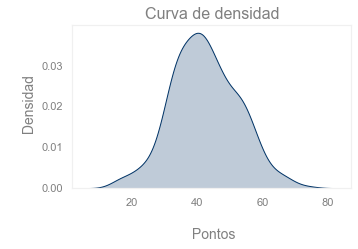

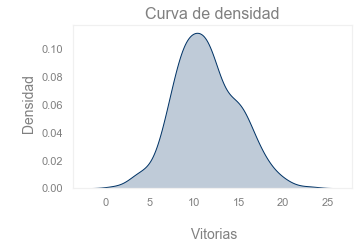

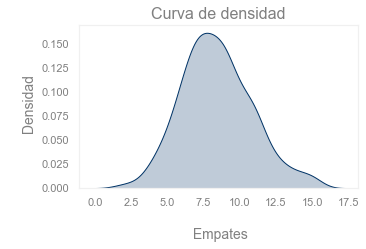

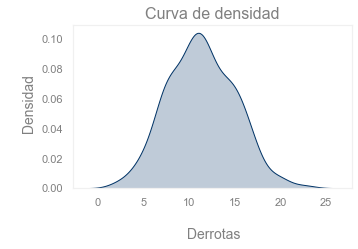

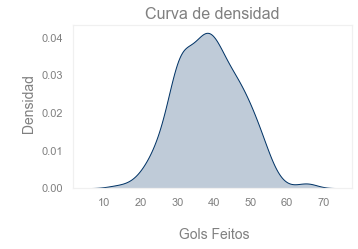

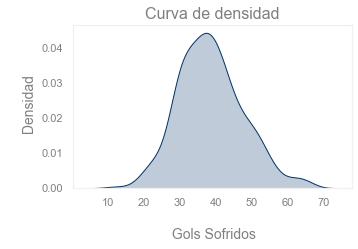

In [28]:
largura = 5 # Ancho del gráfico
altura = 3 # Altura del gráfico

# Definiendo el estilo del gráfico
sns.set(style="white")
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fuente
font_style = 'Arial' # Estilo de fuente

for col in df.iloc[:,2:-4].drop(columns='Jogos').columns:

    # Configurando las dimensiones del gráfico
    fig, ax = plt.subplots(figsize=(largura, altura))

    # Dibujando los gráficos
    sns.kdeplot(df[col], color='#003366', fill=True)

    # Configuración del texto - títulos y ejes
    plt.title('Curva de densidad', fontsize=16, color='gray')
    ax.set_ylabel('\n Densidad', fontsize=14, color='gray')
    ax.set_xlabel(f'\n {col}', fontsize=14, color='gray')

    ax.spines['top'].set_color('#F0F0F0')
    ax.spines['right'].set_color('#F0F0F0')
    ax.spines['left'].set_color('#F0F0F0')
    ax.spines['bottom'].set_color('#F0F0F0')

    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')

    ax.legend(frameon=False)

    plt.show()

### Conclusión

Considerando toda la base, visualmente los datos se aproximan a la distribución normal, demonstrando una media más consistente como se observó en la resumisión estadística.

In [29]:
# Evaluando la resumen estadística de los valores de las variables solo de los campeones
df[df['Campeão'] == 1].iloc[:,2:-1].describe()

,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols Feitos,Gols Sofridos,Final,Campeão,Rebaixado
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0
mean,61.888889,31.0,18.055556,7.722222,5.222222,52.222222,27.111111,1.0,1.0,0.0
std,6.086522,0.0,2.338230,1.708303,1.832888,6.412814,7.193861,0.0,0.0,0.0
min,51.000000,31.0,14.000000,5.000000,2.000000,40.000000,12.000000,1.0,1.0,0.0
25%,56.500000,31.0,16.250000,7.000000,4.000000,48.500000,21.250000,1.0,1.0,0.0
50%,63.000000,31.0,18.000000,7.500000,5.000000,51.500000,27.500000,1.0,1.0,0.0
75%,66.500000,31.0,19.750000,9.000000,6.750000,55.500000,30.750000,1.0,1.0,0.0
max,74.000000,31.0,23.000000,11.000000,8.000000,65.000000,41.000000,1.0,1.0,0.0


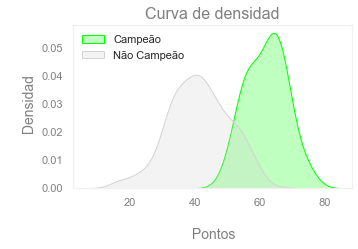

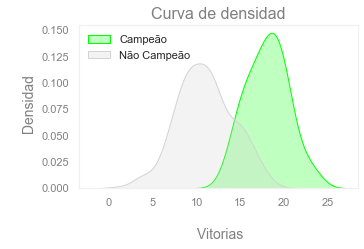

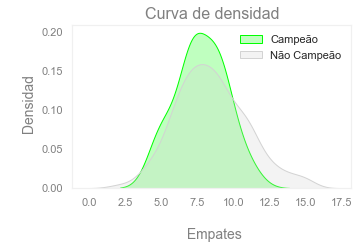

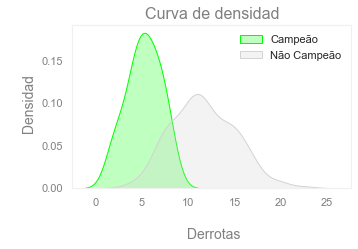

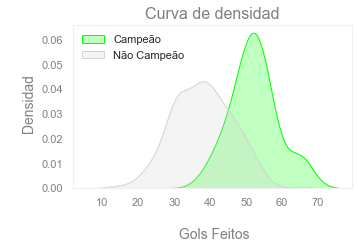

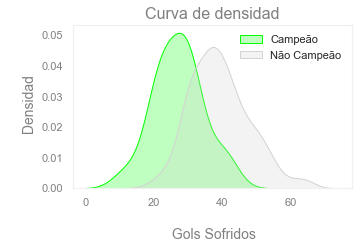

In [30]:
largura = 5 # Ancho del gráfico
altura = 3 # Altura del gráfico

# Definiendo el estilo del gráfico
sns.set(style="white")
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fuente
font_style = 'Arial' # Estilo de fuente

for col in df.iloc[:,2:-4].drop(columns='Jogos').columns:

    # Configurando las dimensiones del gráfico
    fig, ax = plt.subplots(figsize=(largura, altura))

    # Dibujando los gráficos
    sns.kdeplot(df[df['Campeão'] == 1][col], color='#00FF00', fill=True, label = 'Campeão')
    sns.kdeplot(df[df['Campeão'] == 0][col], color='#D3D3D3', fill=True, label = 'Não Campeão')

    # Configuración del texto - títulos y ejes
    plt.title('Curva de densidad', fontsize=16, color='gray')
    ax.set_ylabel('\n Densidad', fontsize=14, color='gray')
    ax.set_xlabel(f'\n {col}', fontsize=14, color='gray')

    ax.spines['top'].set_color('#F0F0F0')
    ax.spines['right'].set_color('#F0F0F0')
    ax.spines['left'].set_color('#F0F0F0')
    ax.spines['bottom'].set_color('#F0F0F0')

    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')

    ax.legend(frameon=False)

    plt.show()

### Conclusión

Diferenciando campeones de no campeones, visualmente los datos se aproximan a la distribución normal, demonstrando una media más consistente como se observó en la resumisión estadística.

<strong style="color: #FF8C00; font-size: 22px"> 

1.2.Correlaciones entre las variables independientes

</strong>

En esta etapa, estudio las relaciones entre las variables independientes.

In [31]:
# Creando base de correlación
df_corr = df.iloc[:,2:-4].drop(columns='Jogos').corr()

# Analizando la tabela de correlación
df_corr

,Pontos,Vitorias,Empates,Derrotas,Gols Feitos,Gols Sofridos
Pontos,1.000000,0.973261,-0.057884,-0.894152,0.736311,-0.710389
Vitorias,0.973261,1.000000,-0.283498,-0.772120,0.739231,-0.635037
Empates,-0.057884,-0.283498,1.000000,-0.382965,-0.133545,-0.207675
Derrotas,-0.894152,-0.772120,-0.382965,1.000000,-0.624520,0.750002
Gols Feitos,0.736311,0.739231,-0.133545,-0.624520,1.000000,-0.189752
Gols Sofridos,-0.710389,-0.635037,-0.207675,0.750002,-0.189752,1.000000


### Conclusión

Los datos de fútbol presentes en la base tienden a estar correlacionados entre sí.

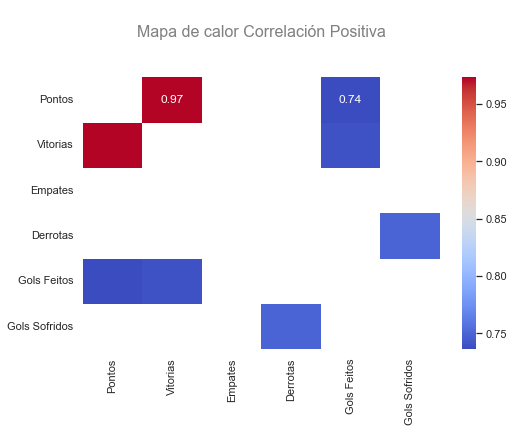

In [32]:
# Definición de la correlación más positiva
corr_positivo = df_corr[(df_corr > 0.5)&(df_corr < 1)]

largura = 8 # Ancho del gráfico
altura = 5 # Altura del gráfico

# Definiendo el estilo del gráfico
sns.set(style="white")
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fuente
font_style = 'Arial' # Estilo de fuente

fig, ax = plt.subplots(figsize=(largura, altura))
sns.heatmap(corr_positivo, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('\nMapa de calor Correlación Positiva\n\n', fontsize=16, color='gray')

plt.show()

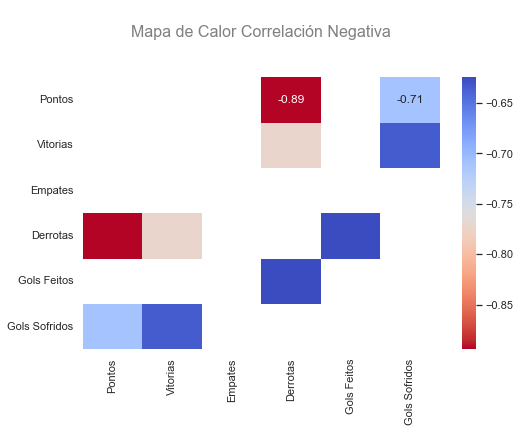

In [33]:
# Definición de la correlación más negativa
corr_negativa = df_corr[(df_corr < -0.5)&(df_corr > -1)]

largura = 8 # Ancho del gráfico
altura = 5 # Altura del gráfico

# Definiendo el estilo del gráfico
sns.set(style="white")
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fuente
font_style = 'Arial' # Estilo de fuente

fig, ax = plt.subplots(figsize=(largura, altura))
sns.heatmap(corr_negativa, annot=True, cmap='coolwarm_r', fmt='.2f', cbar=True)

plt.title('\nMapa de Calor Correlación Negativa\n\n', fontsize=16, color='gray')

plt.show()

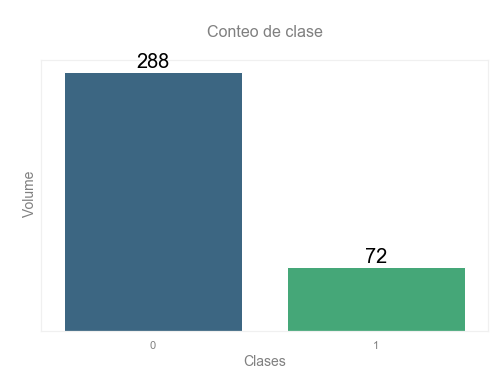

In [34]:
largura = 8 # Ancho del gráfico
altura = 5 # Altura del gráfico

# Definiendo el estilo del gráfico
sns.set(style="white")
plt.rcParams['font.sans-serif'] = 'Arial' # Estilo de fuente
font_style = 'Arial' # Estilo de fuente

fig, ax = plt.subplots(figsize=(largura, altura))
sns.barplot(x=df['Rebaixado'].value_counts().index, y=df['Rebaixado'].value_counts().values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=20, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Configuración del texto - títulos y ejes
plt.title('\nConteo de clase\n', fontsize=16, color='gray')
ax.set_ylabel('\n Volume', fontsize=14, color='gray')
ax.set_xlabel(f'Clases', fontsize=14, color='gray')

ax.spines['top'].set_color('#F0F0F0')
ax.spines['right'].set_color('#F0F0F0')
ax.spines['left'].set_color('#F0F0F0')
ax.spines['bottom'].set_color('#F0F0F0')

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

ax.set_yticks([]) 

ax.legend(frameon=False)

plt.show()

<strong style="color: #FF8C00; font-size: 28px"> 

2.División de los datos en entrenamiento y prueba

</strong>

En nesta etapa, es hora de entreinar el modelo base.

In [35]:
# Separando las bases de entrenamiento y prueba por años
X_treinamento = df[(df.Ano >= 2006)&(df.Ano <= 2016)].drop(columns=['Jogos']).iloc[:,2:-4].values
y_treinamento = df[(df.Ano >= 2006)&(df.Ano <= 2016)].drop(columns=['Jogos']).iloc[:,-2].values

X_teste = df[(df.Ano > 2016)].drop(columns=['Jogos']).iloc[:,2:-4].values
y_teste = df[(df.Ano > 2016)].drop(columns=['Jogos']).iloc[:,-2].values

In [36]:
# Importación de los algoritmos de machine learning, métricas y métodos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy.stats import ks_2samp

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
scaler = StandardScaler()

X_treinamento_scaler = scaler.fit_transform(X_treinamento)
X_teste_scaler = scaler.fit_transform(X_teste)

In [38]:
# Definindo los modelos
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluando cada modelo en la validación cruzada
for model_name, model in models.items():
    scores = cross_val_score(model, X_treinamento_scaler, y_treinamento, cv=30)  # cv=5 para 5 divisões de validação cruzada
    print(f"{model_name} - Acurácia média: {np.mean(scores):.4f} - Desvio padrão: {np.std(scores):.4f}")

Decision Tree - Acurácia média: 0.8821 - Desvio padrão: 0.1192
Logistic Regression - Acurácia média: 0.9083 - Desvio padrão: 0.1020
Random Forest - Acurácia média: 0.8690 - Desvio padrão: 0.1399
Naive Bayes - Acurácia média: 0.8940 - Desvio padrão: 0.1457


### Conclusión

En términos de precisión, todos los modelos tuvieron un buen desempeño, pero la regresión logística fue el mejor modelo.

In [39]:
# Definindo y entrenando el modelo
log_reg_scaler = LogisticRegression(max_iter=1000)
log_reg_scaler.fit(X_treinamento_scaler, y_treinamento)

LogisticRegression(max_iter=1000)

In [41]:
# Prediciendo
y_pred = log_reg_scaler.predict(X_teste_scaler)
y_pred_proba = log_reg_scaler.predict_proba(X_teste)[:,1]

In [42]:
# Resultados
accuracy = accuracy_score(y_teste, y_pred)
print("Acurácia no conjunto de teste:", accuracy)
print("\nRelatório de classificação:\n", classification_report(y_teste, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_teste, y_pred))

Acurácia no conjunto de teste: 0.9214285714285714

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       112
           1       0.90      0.68      0.78        28

    accuracy                           0.92       140
   macro avg       0.91      0.83      0.86       140
weighted avg       0.92      0.92      0.92       140


Matriz de confusão:
 [[110   2]
 [  9  19]]


### Conclusión

De 100 elementos clasificados como verdaderos positivos, 80 de hecho lo son.

Considerando que hay 100 verdaderos positivos en la puebra, el modelo es capaz de identificar 71.

In [43]:
# Calculando la curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)

# Calculando el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

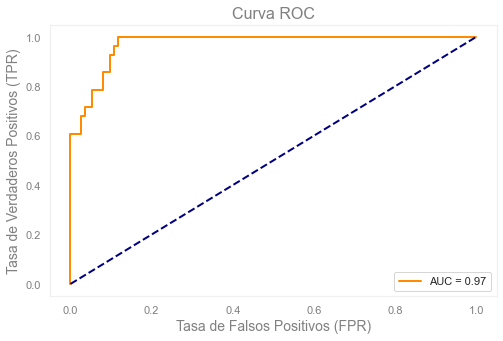

In [44]:
# Generando la curva ROC

largura = 8 # Ancho del gráfico
altura = 5 # Altura del gráfico

fig, ax = plt.subplots(figsize=(largura, altura))

ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (random)

plt.title('Curva ROC', fontsize=16, color='gray')

ax.set_xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14, color='gray')
ax.set_ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14, color='gray')

plt.legend(loc='lower right')

ax.spines['top'].set_color('#F0F0F0')
ax.spines['right'].set_color('#F0F0F0')
ax.spines['left'].set_color('#F0F0F0')
ax.spines['bottom'].set_color('#F0F0F0')

ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

### Conclusión

El modelo discrimina bien entre las dos clases.

In [45]:
# Calcular el KS
ks = max(tpr - fpr)
print(f"Valor KS: {ks:.2f}")

Valor KS: 0.88


In [46]:
# Separamos las probabilidades para las dos clases
probs_class_0 = y_pred_proba[y_teste == 0]
probs_class_1 = y_pred_proba[y_teste == 1]

# Calculamos el valor KS utilizando la prueba de Kolmogorov-Smirnov
ks_stat, p_value = ks_2samp(probs_class_0, probs_class_1)

In [47]:
print(f"Valor KS: {ks_stat:.2f}")
print(f"Valor p: {p_value:.2f}")

Valor KS: 0.88
Valor p: 0.00


### Conclusión

De acuerdo com el KS, el modelo discrimina bien.

<strong style="color: #FF8C00; font-size: 28px"> 

3.Creando base con el score de los datos de prueba

</strong>

En esta etapa, aplicaré el modelo en la tabela de prueba - total de 140 líneas

In [55]:
# Creando base de prueba
df_teste = df[(df.Ano > 2016)].iloc[:,1:]

In [56]:
# Prediciendo
brasileirao_score_campeao_teste = {}
for i in range(len(df_teste)):

    X_input = [list(df_teste.drop(columns=['Jogos']).iloc[i,1:-4].values)]
    
    X_input_scaler = scaler.transform(X_input)

    score = log_reg_scaler.predict_proba(X_input_scaler)[0][1] * 100
    
    brasileirao_score_campeao_teste[i] = np.round(score, 2)

In [50]:
# Creando base con score campeão
brasileirao_score_campeao_teste_df = pd.DataFrame({'Id':list(brasileirao_score_campeao_teste.keys()), 'screbstd':list(brasileirao_score_campeao_teste.values())})

In [51]:
# Creando columna de id para conectar los otros scores
df_teste['Id'] = [i for i in range(len(df_teste))]

In [52]:
# Concatenando y trayendo el modelo
df_teste = df_teste.merge(brasileirao_score_campeao_teste_df[['Id', 'screbstd']], on='Id')

In [53]:
# Resultado
df_teste

,Time,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols Feitos,Gols Sofridos,Final,Campeão,Rebaixado,Ano,Id,screbstd
0,Corinthians,59,31,17,8,6,40,21,1,1,0,2017,0,0.00
1,Palmeiras,54,31,16,6,9,48,33,2,0,0,2017,1,0.01
2,Santos,53,31,14,11,6,33,22,3,0,0,2017,2,0.03
3,Grêmio,51,31,15,6,10,45,28,4,0,0,2017,3,0.03
4,Cruzeiro,48,31,13,9,9,38,30,5,0,0,2017,4,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Santos,37,31,10,7,14,36,55,17,0,1,2023,135,29.63
136,Vasco,34,31,9,7,15,32,42,15,0,0,2023,136,31.30
137,Goiás,32,31,7,11,13,32,46,18,0,1,2023,137,54.62
138,Coritiba,23,31,6,5,20,35,66,19,0,1,2023,138,98.73


In [122]:
# Guardando base
df_teste.to_csv('teste_screbstd.csv')

<strong style="color: #FF8C00; font-size: 28px"> 

4.Prediciendo el Brasileirão 2024

</strong>

En esta etapa, aplicaré el modelo en la tabela del Brasileirão 2024, ronda 31.

In [94]:
# Construyendo la base
brasileirao_data = {
    "Posição": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Time": [
        "Botafogo", "Palmeiras", "Fortaleza", "Flamengo", 
        "Internacional", "São Paulo", "Bahia", "Cruzeiro", 
        "Vasco", "Atlético Mineiro", "Grêmio", "Criciúma", 
        "Fluminense", "Vitória", "Corinthians", "Athletico Paranaense", 
        "Red Bull Bragantino", "Juventude", "Cuiabá", "Atlético Goianiense"
    ],
    "Pontos": [64, 61, 57, 55, 53, 51, 46, 44, 43, 41, 38, 37, 36, 35, 35, 34, 34, 34, 27, 22],
    "Jogos": [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
    "Vitórias": [19, 18, 16, 16, 14, 15, 13, 12, 12, 10, 11, 9, 10, 10, 8, 9, 8, 8, 6, 5],
    "Empates": [7, 7, 9, 7, 11, 6, 7, 8, 7, 11, 5, 10, 6, 5, 11, 7, 10, 10, 9, 7],
    "Derrotas": [5, 6, 6, 8, 6, 10, 11, 11, 12, 9, 15, 12, 15, 16, 12, 14, 13, 13, 16, 19],
    "Gols Marcados": [49, 53, 41, 50, 42, 42, 42, 36, 36, 42, 36, 38, 26, 35, 35, 32, 34, 38, 25, 23],
    "Gols Sofridos": [26, 25, 32, 37, 28, 33, 37, 33, 43, 45, 39, 44, 32, 45, 40, 37, 40, 48, 41, 50]
}


In [95]:
# Creando data frame
brasileirao_df = pd.DataFrame(brasileirao_data)

In [96]:
# Visualizando la base
brasileirao_df

,Posição,Time,Pontos,Jogos,Vitórias,Empates,Derrotas,Gols Marcados,Gols Sofridos
0,1,Botafogo,64,31,19,7,5,49,26
1,2,Palmeiras,61,31,18,7,6,53,25
2,3,Fortaleza,57,31,16,9,6,41,32
3,4,Flamengo,55,31,16,7,8,50,37
4,5,Internacional,53,31,14,11,6,42,28
5,6,São Paulo,51,31,15,6,10,42,33
6,7,Bahia,46,31,13,7,11,42,37
7,8,Cruzeiro,44,31,12,8,11,36,33
8,9,Vasco,43,31,12,7,12,36,43
9,10,Atlético Mineiro,41,31,10,11,9,42,45


In [97]:
# Total de filas
len(brasileirao_df)

20

In [98]:
# Prediciendo
brasileirao_score_campeao = {}
for i in range(len(brasileirao_df)):
    
    X_input = [list(df.drop(columns=['Jogos']).iloc[i,2:-4].values)]
    
    X_input_scaler = scaler.transform(X_input)

    score = log_reg_scaler.predict_proba(X_input_scaler)[0][1] * 100
    brasileirao_score_campeao[brasileirao_df.Time[i]] = np.round(score, 2)

In [99]:
# Creando base con score campeão
bradesileiro_score = pd.DataFrame({'Posição': [i + 1for i in range(20)], 'Time':list(brasileirao_score_campeao.keys()), 'screbstd':list(brasileirao_score_campeao.values())})

In [100]:
# Creación de tabela Brasileirão 2024 con score de relegación
tabela_final = pd.merge(brasileirao_df, bradesileiro_score, on=['Time','Posição']).set_index('Posição')

# Resultado
tabela_final

,Time,Pontos,Jogos,Vitórias,Empates,Derrotas,Gols Marcados,Gols Sofridos,screbstd
Posição,,,,,,,,,
1,Botafogo,64,31,19,7,5,49,26,0.00
2,Palmeiras,61,31,18,7,6,53,25,0.01
3,Fortaleza,57,31,16,9,6,41,32,0.01
4,Flamengo,55,31,16,7,8,50,37,0.01
5,Internacional,53,31,14,11,6,42,28,0.10
6,São Paulo,51,31,15,6,10,42,33,0.15
7,Bahia,46,31,13,7,11,42,37,0.29
8,Cruzeiro,44,31,12,8,11,36,33,0.32
9,Vasco,43,31,12,7,12,36,43,1.11


In [101]:
# Guardando la base
tabela_final.to_csv('modelo_screbstd.csv')